### Lecture 19: Handling Missing Values in Numerical Data (Mean/Median)

Steps
1. Checking which columns have MCAR (Missing completely at random)
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
  <br> a. Making sure Nan Values are MCAR
1. Getting mean/median of the column
2. Replacing missing values with mean/median.
3. Visualizing Changes 

Importing Useful Libraries

In [51]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Importing Data

In [52]:
df=pd.read_csv('insurance.csv',usecols=['age','bmi','smoker'])
df.head()


,age,bmi,smoker
0,19.0,27.900,yes
1,18.0,33.770,no
2,28.0,33.000,no
3,33.0,22.705,no
4,32.0,28.880,no


Step 1

In [53]:
df.isnull().mean()*100

age       17.638266
bmi        9.417040
smoker     0.000000
dtype: float64

Step 2

In [54]:
X=df.drop(columns='smoker',axis=1)
Y=df.smoker

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(1070, 2)
(268, 2)


Step 3

In [57]:
col=[var for var in X_train.columns if X_train[var].isnull().mean()>0]

In [58]:
print(col)


['age', 'bmi']


In [59]:
X_train.sample(20)

,age,bmi
263,19.0,NaN
1126,55.0,29.900
898,18.0,40.260
1042,20.0,30.685
1017,26.0,34.200
736,37.0,38.390
431,29.0,20.235
1140,50.0,37.070
596,42.0,29.480
917,NaN,22.895


Step 4

In [60]:
bmi_mean=X_train['bmi'].mean()
bmi_median=X_train['bmi'].median()


In [61]:
age_mean=X_train['age'].mean()
age_median=X_train['age'].median()


In [62]:
print(f'{bmi_mean},{bmi_median},{age_mean},{age_median}')

30.43314374353671,30.115,39.31525423728814,40.0


In [63]:
X_train['bmi']

560        NaN
1285    24.320
1142    24.860
969     34.320
486     21.470
         ...  
1095    31.350
1130    23.870
1294    25.175
860     47.600
1126    29.900
Name: bmi, Length: 1070, dtype: float64

Step 5

In [64]:
X_train['mean_age']=X_train['age'].fillna(age_mean)
X_train['median_age']=X_train['age'].fillna(age_median)

X_train['mean_bmi']=X_train['age'].fillna(bmi_mean)
X_train['median_bmi']=X_train['age'].fillna(bmi_median)



In [65]:
X_train['mean_bmi']

560     46.000000
1285    47.000000
1142    52.000000
969     39.000000
486     30.433144
          ...    
1095    30.433144
1130    39.000000
1294    58.000000
860     37.000000
1126    55.000000
Name: mean_bmi, Length: 1070, dtype: float64

In [66]:
X_train['mean_age']

560     46.000000
1285    47.000000
1142    52.000000
969     39.000000
486     39.315254
          ...    
1095    39.315254
1130    39.000000
1294    58.000000
860     37.000000
1126    55.000000
Name: mean_age, Length: 1070, dtype: float64

Using mean

In [67]:
# X_train['age']=X_train['age'].fillna(age_mean)
# X_train['bmi']=X_train['bmi'].fillna(bmi_mean)

In [68]:
X_train

,age,bmi,mean_age,median_age,mean_bmi,median_bmi
560,46.0,NaN,46.000000,46.0,46.000000,46.000
1285,47.0,24.320,47.000000,47.0,47.000000,47.000
1142,52.0,24.860,52.000000,52.0,52.000000,52.000
969,39.0,34.320,39.000000,39.0,39.000000,39.000
486,NaN,21.470,39.315254,40.0,30.433144,30.115
...,...,...,...,...,...,...
1095,NaN,31.350,39.315254,40.0,30.433144,30.115
1130,39.0,23.870,39.000000,39.0,39.000000,39.000
1294,58.0,25.175,58.000000,58.0,58.000000,58.000
860,37.0,47.600,37.000000,37.0,37.000000,37.000


Visualization

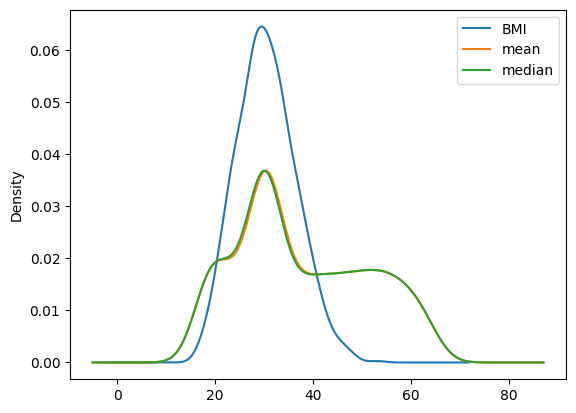

In [69]:
# BMi

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
X_train['mean_bmi'].plot(kind='kde',ax=axis,label='mean')
X_train['median_bmi'].plot(kind='kde',ax=axis,label='median')
axis=plt.legend()

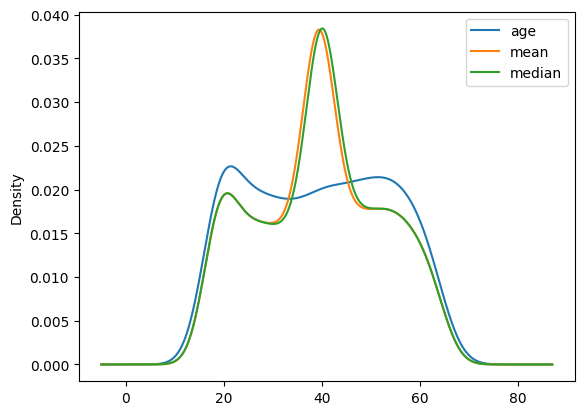

In [70]:
# age

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['age'].plot(kind='kde',ax=axis,label='age')
X_train['mean_age'].plot(kind='kde',ax=axis,label='mean')
X_train['median_age'].plot(kind='kde',ax=axis,label='median')
axis=plt.legend()

In [71]:
X_train.corr()

,age,bmi,mean_age,median_age,mean_bmi,median_bmi
age,1.000000,0.087079,1.000000,1.000000,1.000000,1.000000
bmi,0.087079,1.000000,0.079005,0.078159,0.086670,0.086828
mean_age,1.000000,0.079005,1.000000,0.999796,0.967301,0.965041
median_age,1.000000,0.078159,0.999796,1.000000,0.961978,0.959547
mean_bmi,1.000000,0.086670,0.967301,0.961978,1.000000,0.999962
median_bmi,1.000000,0.086828,0.965041,0.959547,0.999962,1.000000


In [72]:
X_train.cov()

,age,bmi,mean_age,median_age,mean_bmi,median_bmi
age,198.625615,7.375952,198.625615,198.625615,198.625615,198.625615
bmi,7.375952,36.396240,6.045615,5.982282,6.867137,6.896563
mean_age,198.625615,6.045615,164.251678,164.251678,164.251678,164.251678
median_age,198.625615,5.982282,164.251678,164.318792,163.381118,163.349935
mean_bmi,198.625615,6.867137,164.251678,163.381118,175.544068,175.948544
median_bmi,198.625615,6.896563,164.251678,163.349935,175.948544,176.367508


In [73]:
print(f'Variance Before: {X_train['age'].var()}\nAfter Mean Imputation: {X_train['mean_age'].var()}')

Variance Before: 198.62561546130837
After Mean Imputation: 164.2516782673495


<Axes: >

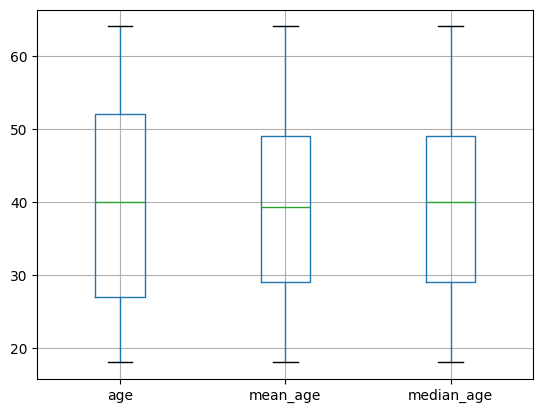

In [74]:
# Outliers

X_train[['age','mean_age','median_age']].boxplot()

<Axes: >

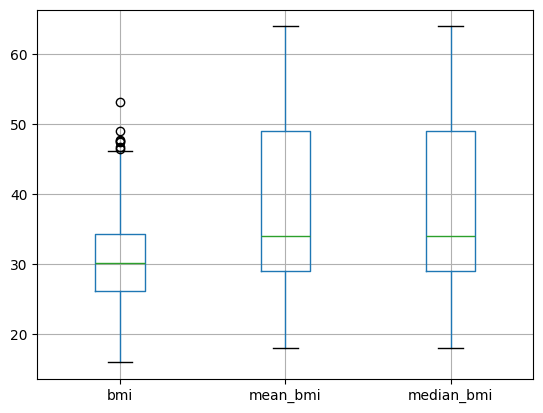

In [75]:
X_train[['bmi','mean_bmi','median_bmi']].boxplot()